In [1]:
# ATMS 305, Fall 2024 -- Lab26: Linear regression
# We are following the Python Data Science Handbook
#   (PDSH), 2nd edition, pages 419 forward.
# Suggestion: Bring it up on another screen!

In [12]:
# IMPORT
#   as usual:  matplotlib/pyplot  /and/  numpy
#   seaborn as sns   /and then do:/  sns.set()
#      sns.set sets the defaults for many plot types.
#      info: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

# GIVEN: finally, we import the linear regression
#  and pipeline modules from Skikit-Learn:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.api as sm

sns.set()

/var/folders/fq/yhc15l3553s2hj67x260wl7r0000gn/T/ipykernel_22189/1670774723.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Model slope=2.027, intercept=-4.999')

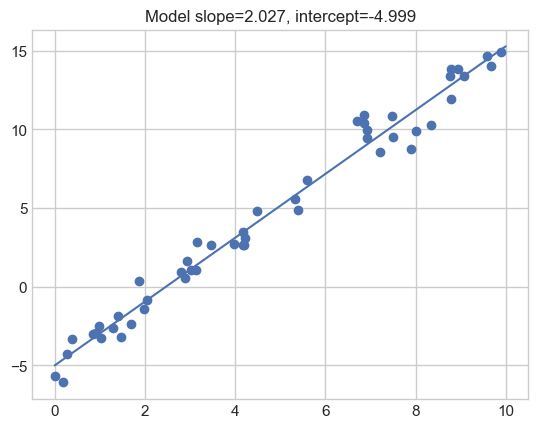

In [7]:
# >> A. SIMPLE LINEAR REGRESSION
#
#   1. Create the code on pp. 421-422: regression of scattered data.
#      RandomState has " a number of methods for generating random numbers
#          drawn from a variety of probability distributions."
#   2. Include the linear regression for figure 42-2 on p. 421.
#      This line has a slope of approx. +2 and intercept of approx. -5.
#   3. >> put the model's fit slope and intercept in the plot TITLE, like:
#           Model slope=X.XXX, intercept=YY.YYY
#      ... using model.coef_[0] and model.intercept_
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.title(f'Model slope={model.coef_[0]:5.3f}, intercept={model.intercept_:6.3f}')


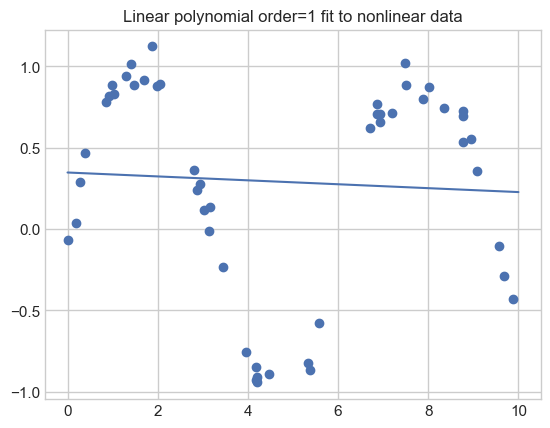

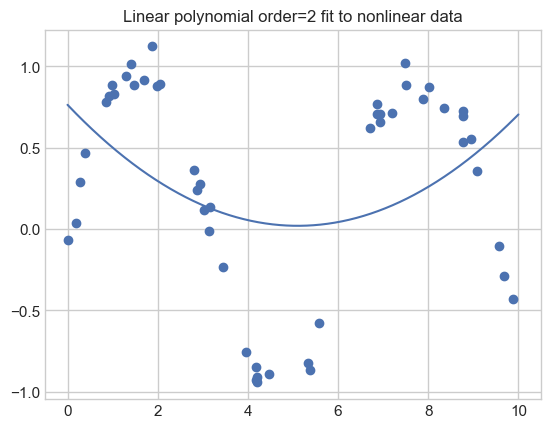

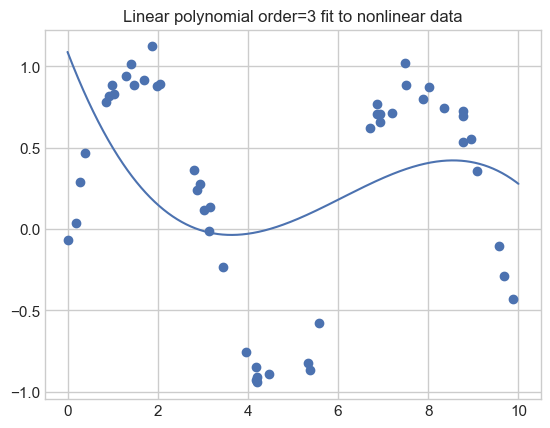

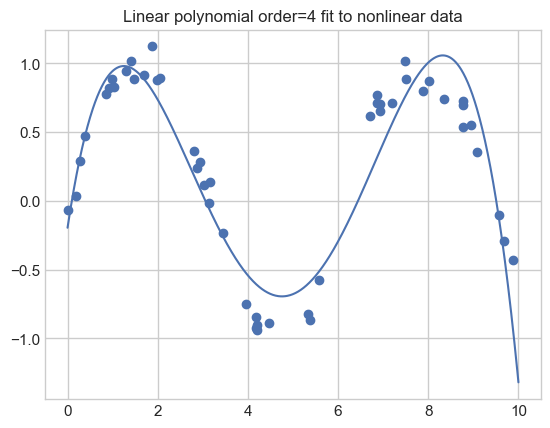

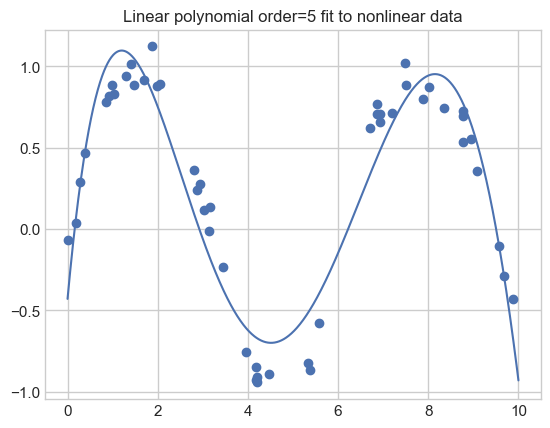

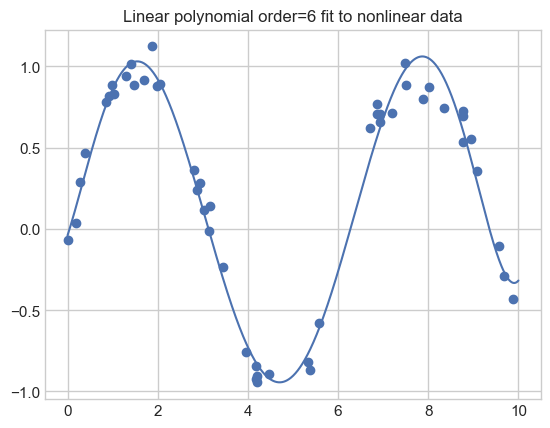

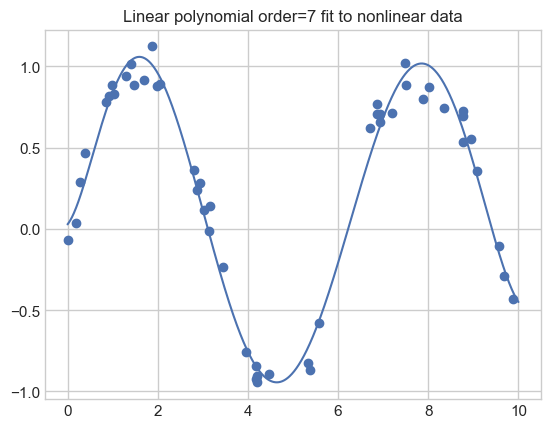

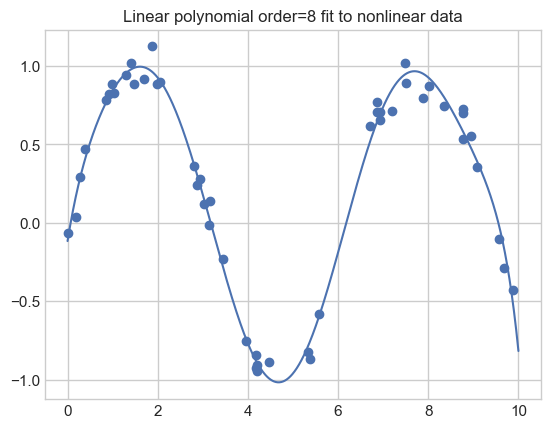

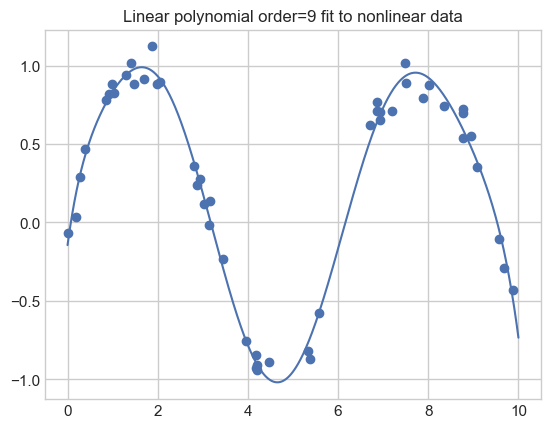

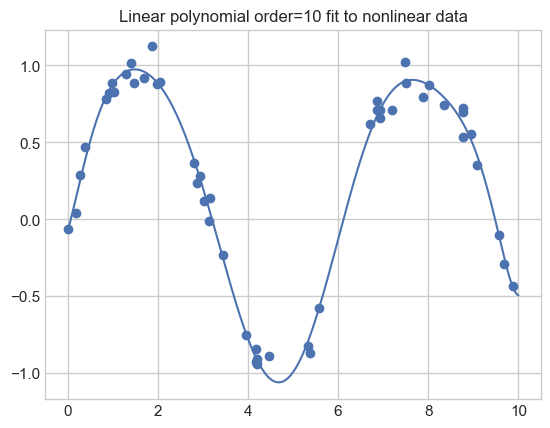

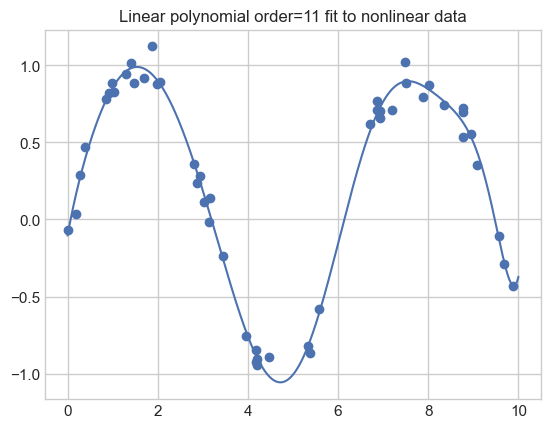

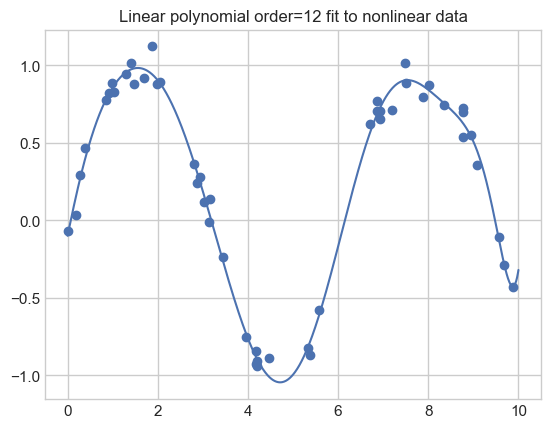

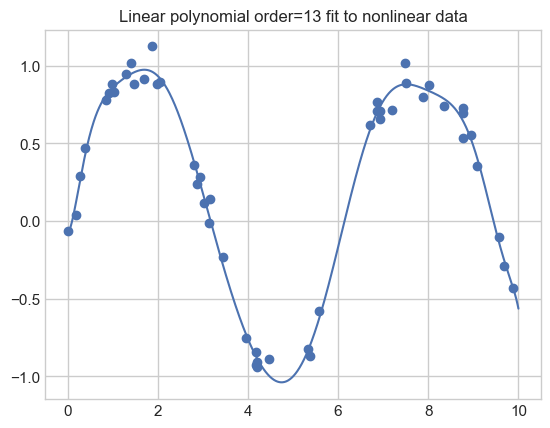

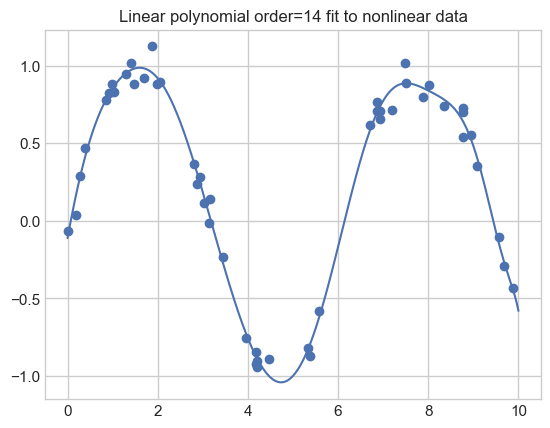

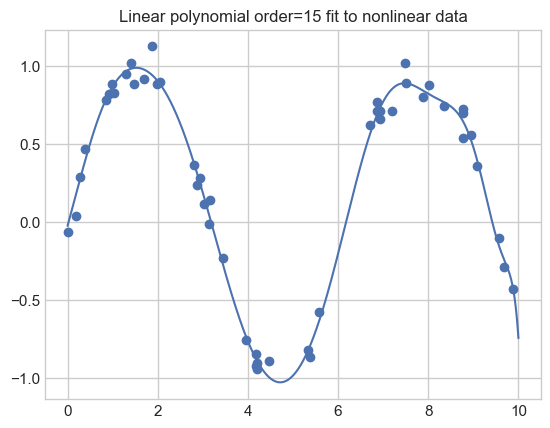

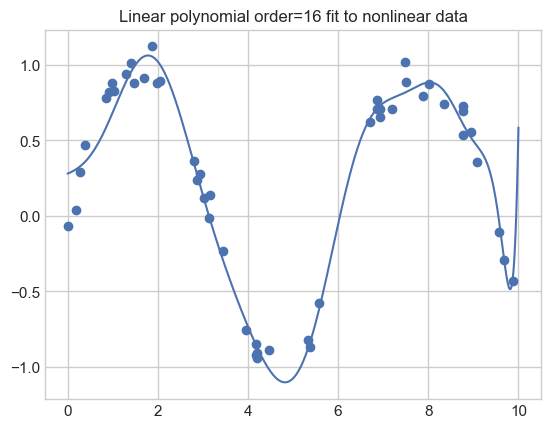

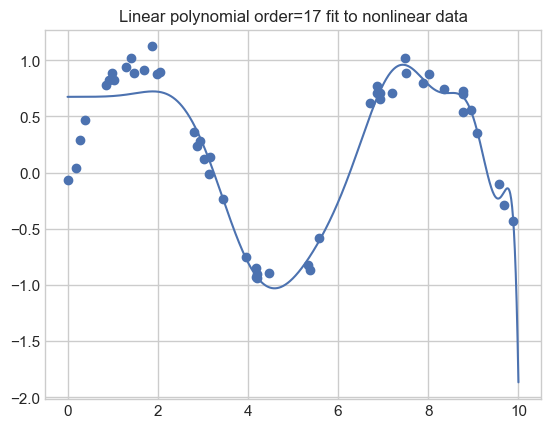

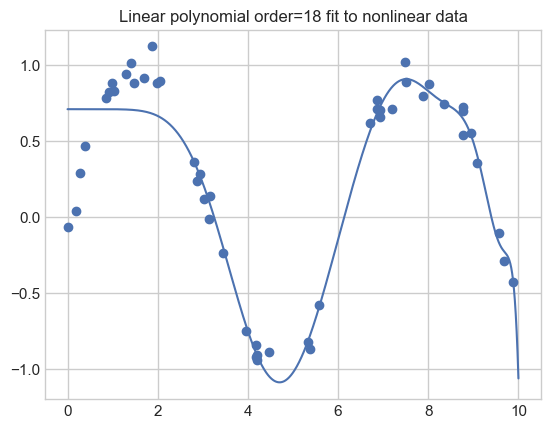

In [10]:
# >> B. BASIC FUNCTION REGRESSION
#
#  1. Make the 7th degree polynomial model using code on p. 423
#        "poly_model = make_pipeline(..."
#  2. Make the "sine wave with noise" in fig. 42-3 on p. 423,
#      along with the 7th-degree polynomial model fit.
#  3. Run it ... Confirm it produces figure 42-3.
#
#  4. Now put -- BEFORE all your code -- a for-loop
#       with variable 'order' in range() so that
#       order will take values of 1,2,...,18 (*inclusive*)
#  5. Indent everything else so it is now part of that for-loop.
#  6. Change PolynomialFeatures(7) to instead be (order), i.e. use
#       your for-loop variable in defining the polynomial order.
#  7. Add plt.figure() before the plotting - this will start a new
#       figure each time through the loop.
#  8. Add title within the loop to show the order:
#         Linear polynomial order=X fit to nonlinear data
#         (where "X" above comes from variable "order")
#
# Notice: anything before order=4 is pretty poor ... and
#   notice what happens on the right side for high order e.g. 16+

for order in range(1, 19):
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(50)
    y = np.sin(x) + 0.1 * rng.randn(50)
    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xfit, yfit)
    plt.title(f'Linear polynomial order={order} fit to nonlinear data')

(0.0, 10.0)

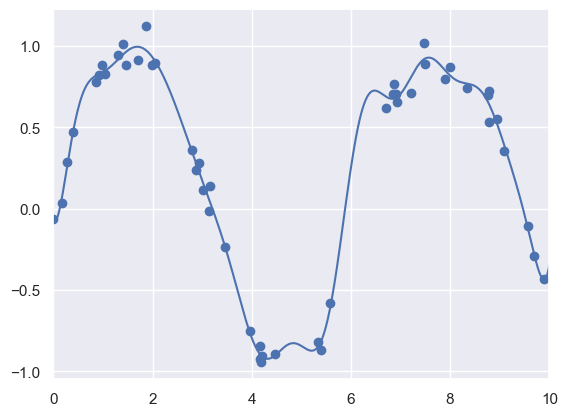

In [14]:
# >> C. GAUSSIAN BASIS FUNCTION
#
#   1. Add his "class GaussianFeatures" code.
#   2. Plot his Fig. 42-5 to make sure it is working correctly.
#     a) Indenting will be fun.
#     b) Remember select-code + tab moves code right,
#          shift-tab moves code left.
#     c) the lines starting with "gauss_model.fit ..." are UNindented!
class GaussianFeatures(BaseEstimator, TransformerMixin):

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
        self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

(-4.0, 1.5)

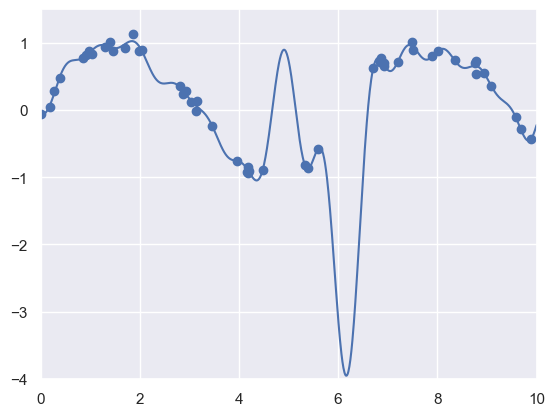

In [17]:
# >> D. OVERFITTING PART 1
#
#   1. Add PDSH's code for fig. 42-6, on p. 426.
#   2. Change his plotting y-limits to be: -4, 1.5

model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-4, 1.5)

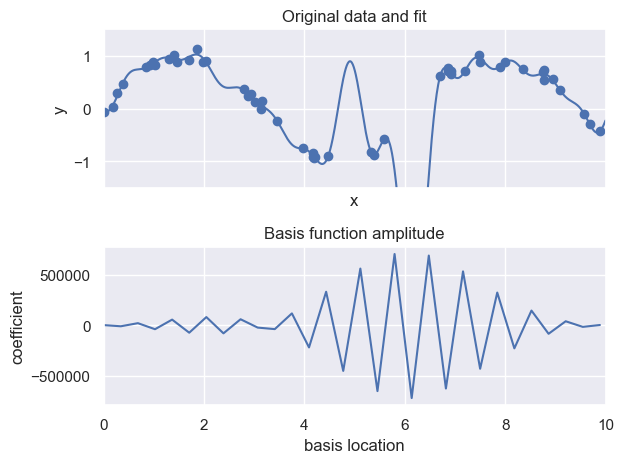

In [19]:
# >> E. OVERFITTING PART 2
#
#   1. We'll follow PDSH and plot the prior curve
#      along with the basis function values
#   2. Code up his basis_plot() routine on p. 426, and figure 42-7.
#   3. Change his basis function in these ways:
#     a) to the ax[0].set(), add: title='Original data and fit'
#     b) to the ax[1].set(), add: title='Basis function amplitude'
#     c) at the end of basis_plot(), call tight_layout

def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5), title='Original data and fit')
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10), title='Basis function amplitude')
    plt.tight_layout()
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

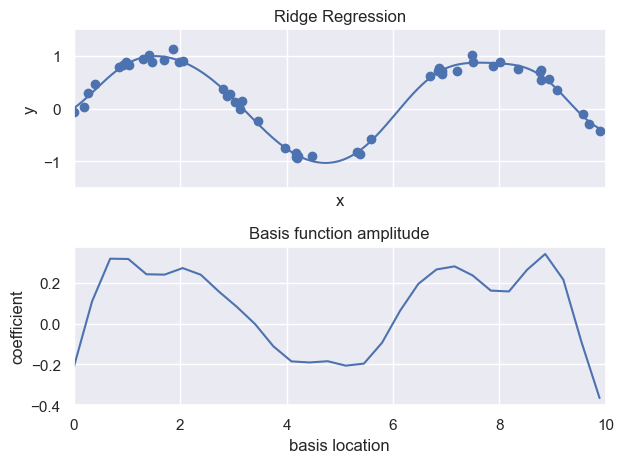

In [20]:
# >> F. REGULARIZATION
#
#   1. Assuming your basis_plot() code worked ...
#   2. Run his code with Ridge (L2) regularization.
#      It's just 3 lines!
#   3. Add: plt.figure() to start a new figure.
#   4. Add the lines for Lasso regularization.

from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME